### Henry Analysis

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")

In [8]:
from data_loader import data_load_and_split

/Users/henrycladouhos/Documents/GitHub/Erdos_Trees/machine_learning/data_loader.py:5: DtypeWarning: Columns (86,168,207,211,215) have mixed types. Specify dtype option on import or set low_memory=False.
  def data_load_and_split(big_data=pd.read_csv('../Data/final_big_data.csv'),
/Users/henrycladouhos/Documents/GitHub/Erdos_Trees/machine_learning/data_loader.py:6: DtypeWarning: Columns (55,59,63) have mixed types. Specify dtype option on import or set low_memory=False.
  trimmed_data= pd.read_csv('../Data/trimmed_data.csv'),


In [9]:
from data_loader import data_merge

In [10]:
big_firstMeas_train, big_secondMeas_train, big_firstMeas_test, big_secondMeas_test, trimmed_firstMeas_train, trimmed_secondMeas_train, trimmed_firstMeas_test, trimmed_secondMeas_test = data_load_and_split()


In [11]:
combined_train =data_merge(trimmed_firstMeas_train, trimmed_secondMeas_train,show_counts_after_burn=True)
combined_train.info()

SPCD inconsistent; column will not be merged.
SPGRPCD inconsistent; column will not be merged.
 STATUSCD_post_burn
2    5377
1    2066
3     313
0     180
Name: count, dtype: int64 
0 = couldn't resample, 1 = alive, 2 = dead, 3 = removed by humans
<class 'pandas.core.frame.DataFrame'>
Index: 7443 entries, 0 to 9724
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CN                  7443 non-null   int64  
 1   ALIVE_pre_burn      7443 non-null   int64  
 2   CULL_pre_burn       6751 non-null   float64
 3   DIA_pre_burn        7443 non-null   float64
 4   HT_pre_burn         7443 non-null   float64
 5   DRYBIO_AG_pre_burn  7443 non-null   float64
 6   ELEV                7443 non-null   float64
 7   SOFTWOOD            7443 non-null   int64  
 8   YRS_SINCE_BURN      7443 non-null   float64
 9   NUM_BURNS           7443 non-null   int64  
 10  BURN_AREA_TOTAL     7443 non-null   float64
 11  ALIVE_po

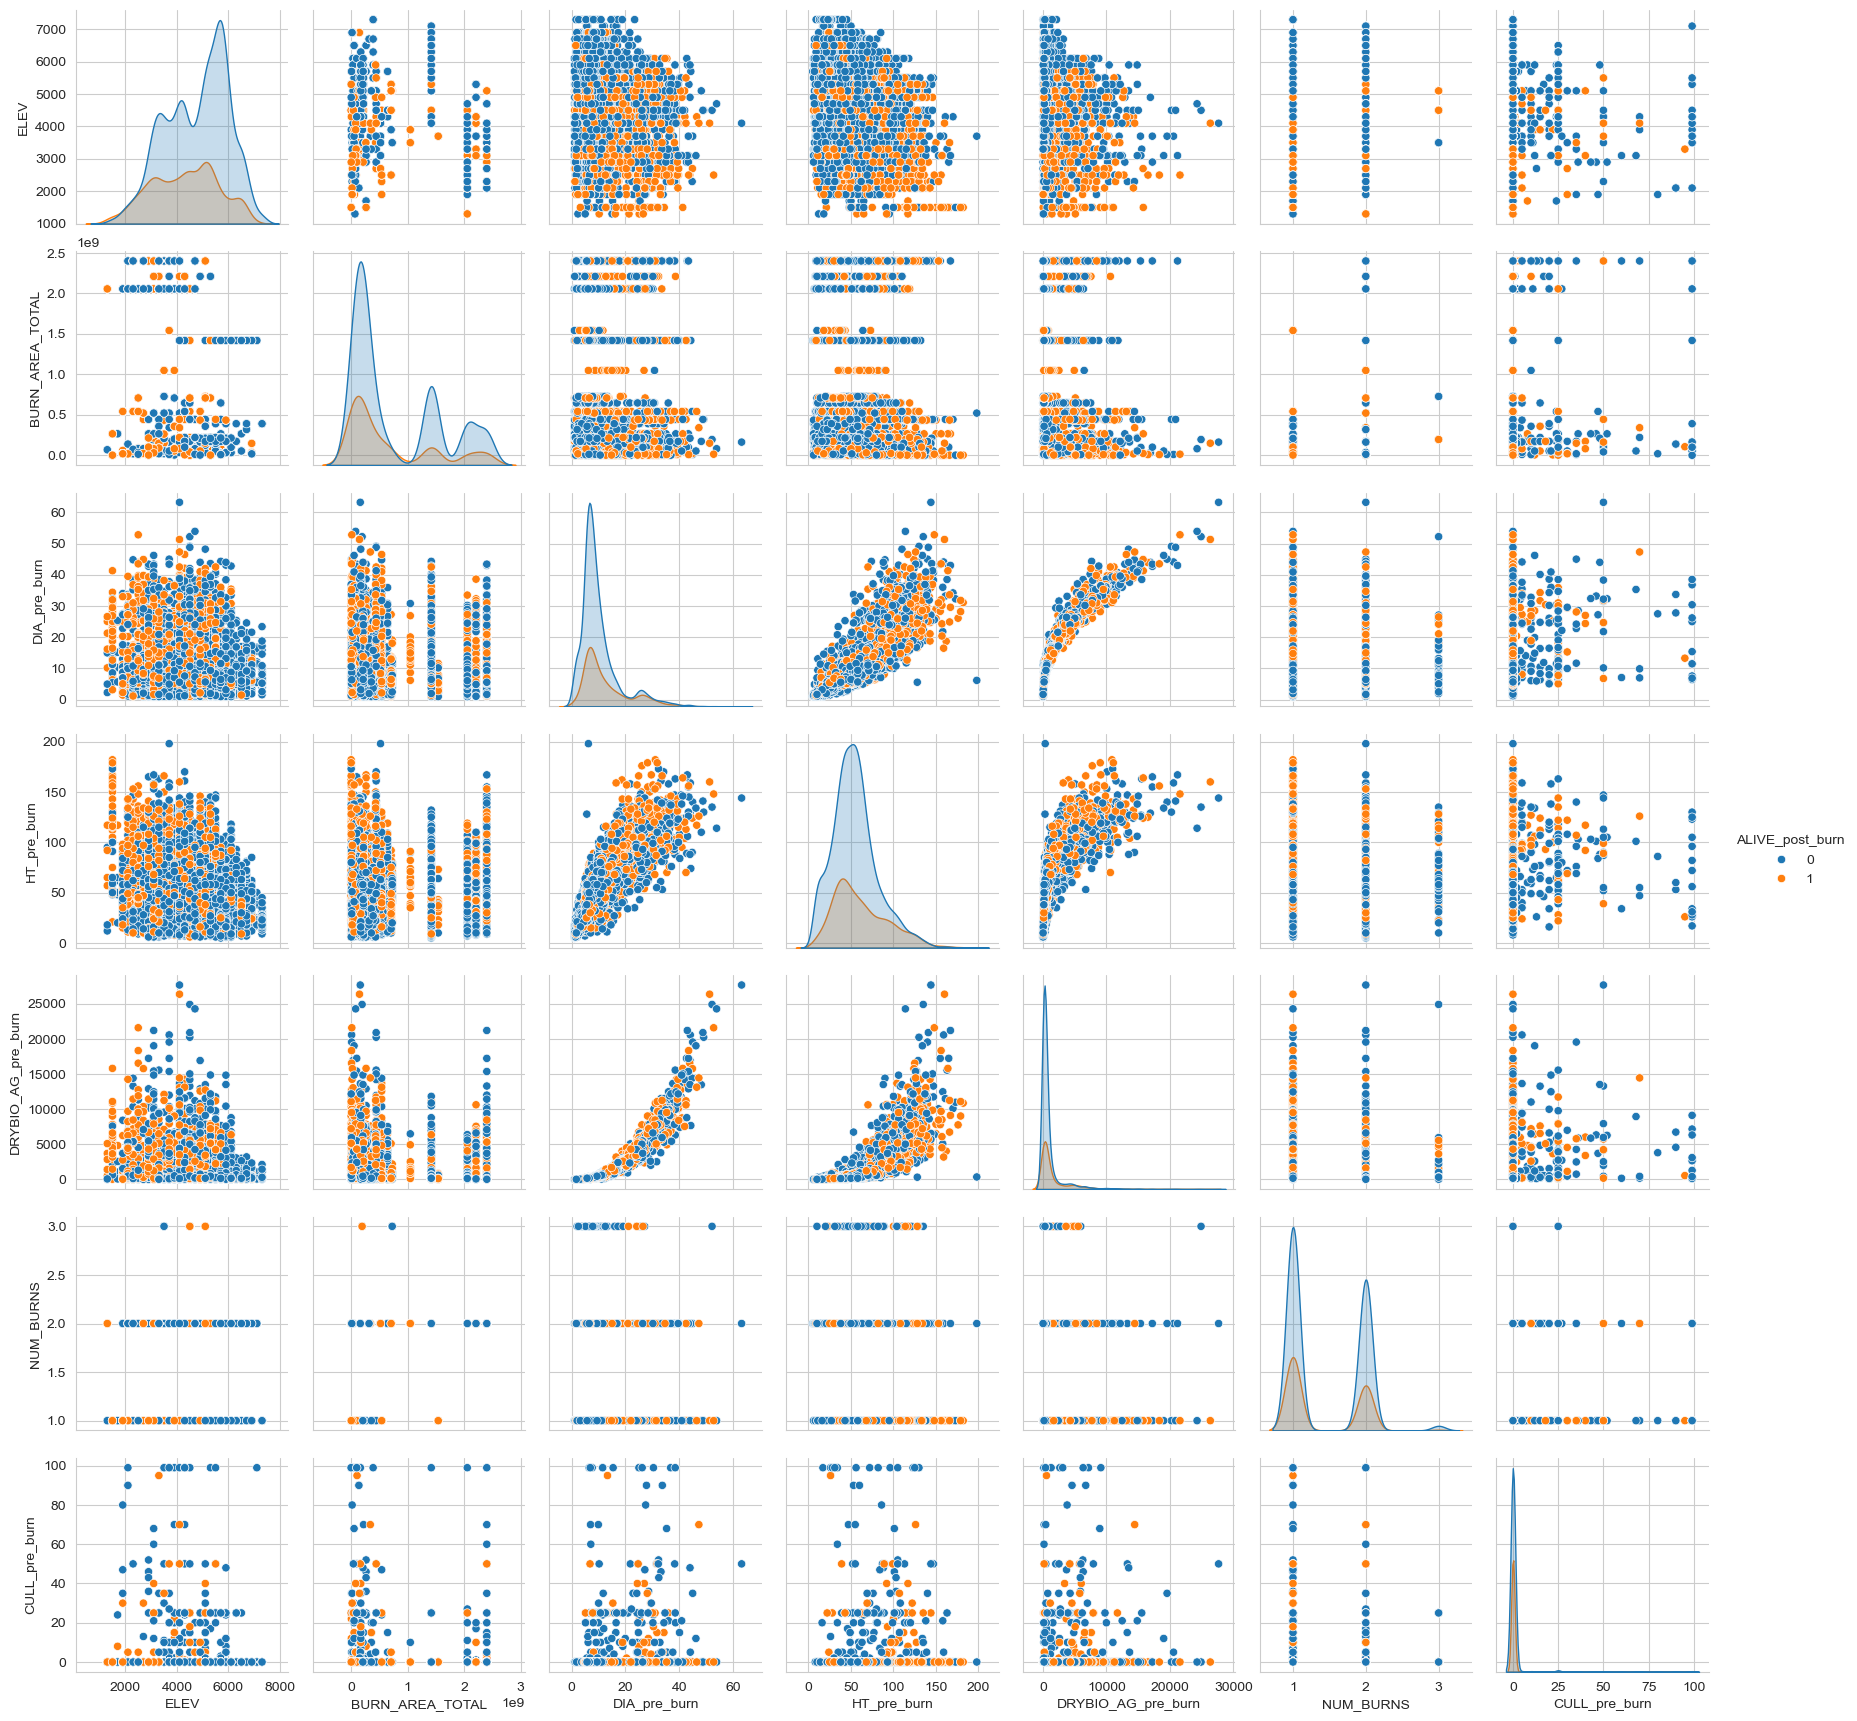

In [12]:
sns.pairplot(combined_train[["ELEV", "BURN_AREA_TOTAL","DIA_pre_burn","HT_pre_burn","DRYBIO_AG_pre_burn","NUM_BURNS","CULL_pre_burn","ALIVE_post_burn"]],hue="ALIVE_post_burn")

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [15]:
features = ["ELEV", "BURN_AREA_TOTAL","DIA_pre_burn","HT_pre_burn","DRYBIO_AG_pre_burn","NUM_BURNS","YRS_SINCE_BURN","CULL_pre_burn"]

In [16]:
combined_test =data_merge(trimmed_firstMeas_test, trimmed_secondMeas_test,show_counts_after_burn=True)

SPCD inconsistent; column will not be merged.
SPGRPCD inconsistent; column will not be merged.
 STATUSCD_post_burn
2    1377
1     511
3      94
0      35
Name: count, dtype: int64 
0 = couldn't resample, 1 = alive, 2 = dead, 3 = removed by humans


In [45]:

combined_train_drop = combined_train.dropna()
combined_test_drop = combined_test.dropna()
combined_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7443 entries, 0 to 9724
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CN                  7443 non-null   int64  
 1   ALIVE_pre_burn      7443 non-null   int64  
 2   CULL_pre_burn       6751 non-null   float64
 3   DIA_pre_burn        7443 non-null   float64
 4   HT_pre_burn         7443 non-null   float64
 5   DRYBIO_AG_pre_burn  7443 non-null   float64
 6   ELEV                7443 non-null   float64
 7   SOFTWOOD            7443 non-null   int64  
 8   YRS_SINCE_BURN      7443 non-null   float64
 9   NUM_BURNS           7443 non-null   int64  
 10  BURN_AREA_TOTAL     7443 non-null   float64
 11  ALIVE_post_burn     7443 non-null   int64  
 12  CULL_post_burn      5764 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 814.1 KB


In [64]:
rfc = RandomForestClassifier(max_depth=3, n_estimators=100,random_state=216)
rfc.fit(combined_train_drop[features],combined_train_drop['ALIVE_post_burn'])

RandomForestClassifier(max_depth=3, random_state=216)

In [65]:
first_preds = rfc.predict(combined_test_drop[features])

accuracy = accuracy_score(combined_test_drop['ALIVE_post_burn'],first_preds)
print('Accuracy:',accuracy)


Accuracy: 0.702943189596167


In [ ]:
from sklearn import tree

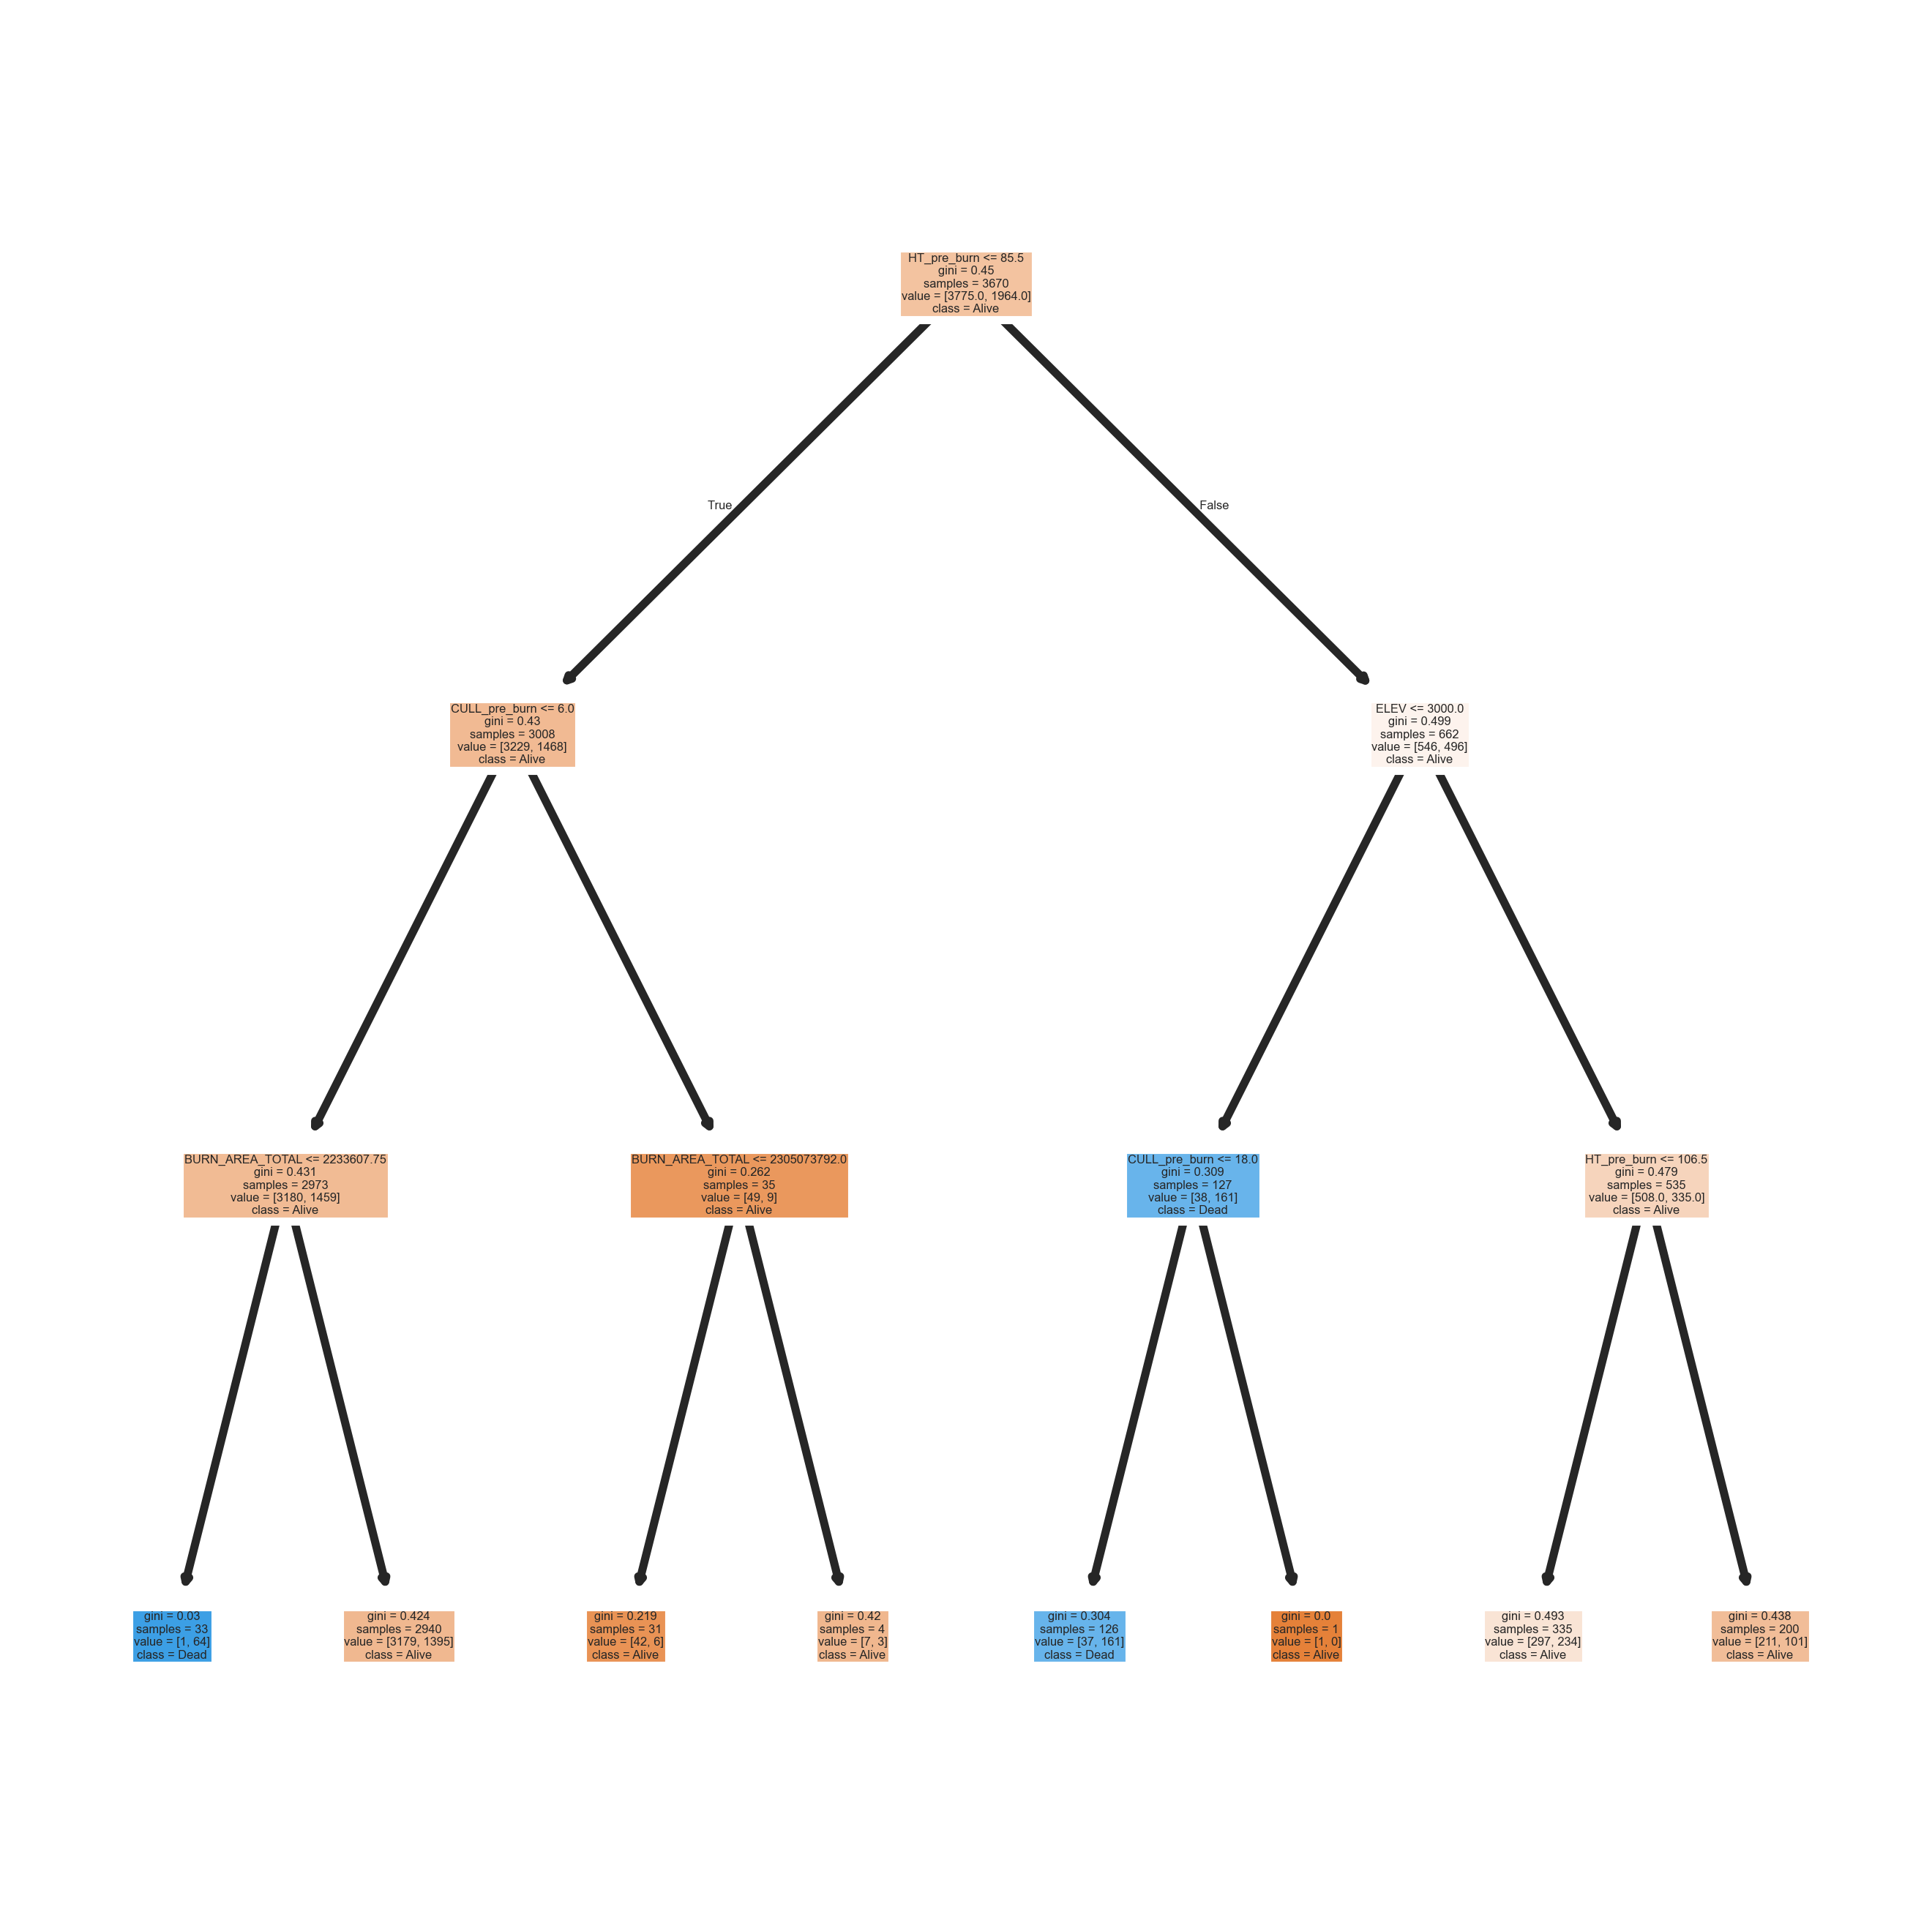

In [91]:
fig,axs = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4),dpi = 800)
tree.plot_tree(rfc.estimators_[0],feature_names=features,class_names=['Alive','Dead'], filled = True)
fig.savefig('rf_individualtree.png')


In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [67]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv = 5,random_state=216)

In [68]:
rand_search.fit(combined_train_drop[features],combined_train_drop['ALIVE_post_burn'])

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x29f4e6810>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x29f476bd0>},
                   random_state=216)

In [69]:
best_forest = rand_search.best_estimator_
print(rand_search.best_params_)

{'max_depth': 17, 'n_estimators': 260}


In [70]:
best_index = rand_search.best_index_
cv_results = pd.DataFrame(rand_search.cv_results_)
print(cv_results.iloc[best_index])   

mean_fit_time                                       0.624969
std_fit_time                                         0.02373
mean_score_time                                     0.023946
std_score_time                                      0.000242
param_max_depth                                           17
param_n_estimators                                       260
params                {'max_depth': 17, 'n_estimators': 260}
split0_test_score                                   0.831882
split1_test_score                                   0.813589
split2_test_score                                   0.826655
split3_test_score                                   0.810105
split4_test_score                                   0.818657
mean_test_score                                     0.820177
std_test_score                                      0.008076
rank_test_score                                            1
Name: 0, dtype: object


In [63]:
best_forest_pred = best_forest.predict(combined_test_drop[features])
accuracy = accuracy_score(combined_test_drop['ALIVE_post_burn'],best_forest_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.8069815195071869


Best random forest model gives 80% accuracy on the test set.  Lets look at confusion matrix.  

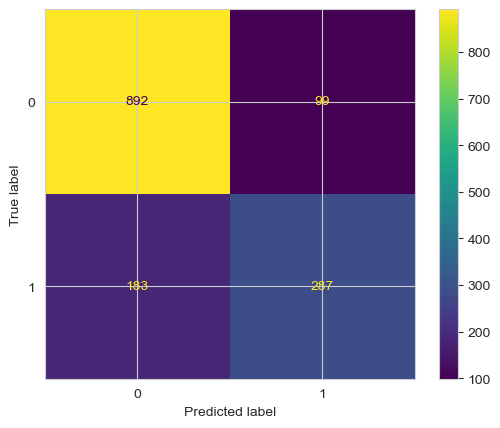

In [71]:
cm = confusion_matrix(combined_test_drop['ALIVE_post_burn'],best_forest_pred)
ConfusionMatrixDisplay(confusion_matrix= cm).plot()

<Axes: >

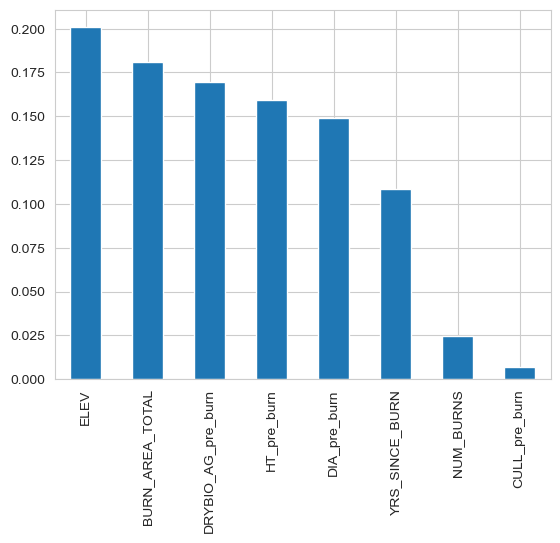

In [72]:
feature_importances = pd.Series(best_forest.feature_importances_, index=features).sort_values(ascending=False)
feature_importances.plot.bar()

We can see the importances of the features here.  This could be useful for model selection.  

In [78]:
from sklearn import tree

In [26]:
combined_train.sample(3)

,CN,ALIVE_pre_burn,CULL_pre_burn,DIA_pre_burn,HT_pre_burn,DRYBIO_AG_pre_burn,ELEV,SOFTWOOD,YRS_SINCE_BURN,NUM_BURNS,BURN_AREA_TOTAL,ALIVE_post_burn,CULL_post_burn
6483,22407651010497,1,0.0,13.4,63.0,848.980872,6700.0,1,1.0,2,3.181307e+08,0,0.0
9271,8601048010901,1,0.0,11.3,78.0,782.149636,4100.0,1,2.0,1,1.641320e+08,0,0.0
4342,22407094010497,1,0.0,10.5,75.0,659.112129,5700.0,1,4.0,1,7.711177e+06,1,0.0


In [27]:
from sklearn.inspection import PartialDependenceDisplay

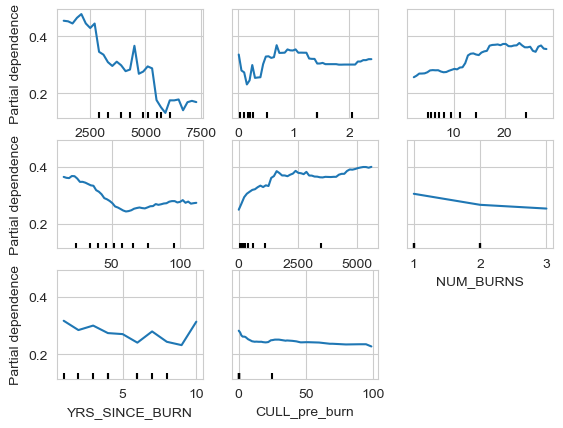

In [28]:
PartialDependenceDisplay.from_estimator(best_forest, combined_train[features], features=features, grid_resolution=50)

### Try CATBOOST?

In [29]:
from catboost import CatBoostClassifier

In [30]:
cat = CatBoostClassifier()

- strip na from cull_pre_burn
- Kfold- actually done automatically by RandomizedSearchCV